# Module - 2

# Visualization

In [1]:
import pandas as p
import numpy as n
import seaborn as s
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=p.read_csv('churn.csv')

In [4]:
data

Customer ID  Gender  Age Married  Number of Dependents          City  \
0     0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1     0003-MKNFE    Male   46      No                     0      Glendale   
2     0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3     0011-IGKFF    Male   78     Yes                     0      Martinez   
4     0013-EXCHZ  Female   75     Yes                     0     Camarillo   
...          ...     ...  ...     ...                   ...           ...   
7038  9987-LUTYD  Female   20      No                     0       La Mesa   
7039  9992-RRAMN    Male   40     Yes                     0     Riverbank   
7040  9992-UJOEL    Male   22      No                     0           Elk   
7041  9993-LHIEB    Male   21     Yes                     0  Solana Beach   
7042  9995-HOTOH    Male   36     Yes                     0   Sierra City   

      Zip Code   Latitude   Longitude  Number of Referrals  ...  \
0        93225  34.827662 -118.999073                    2  ...   
1        91206  34.162515 -118.203869                    0  ...   
2        92627  33.645672 -117.922613                    0  ...   
3        94553  38.014457 -122.115432                    1  ...   
4        93010  34.227846 -119.079903                    3  ...   
...        ...        ...         ...                  ...  ...   
7038     91941  32.759327 -116.997260                    0  ...   
7039     95367  37.734971 -120.954271                    1  ...   
7040     95432  39.108252 -123.645121                    0  ...   
7041     92075  33.001813 -117.263628                    5  ...   
7042     96125  39.600599 -120.636358                    1  ...   

       Payment Method Monthly Charge Total Charges  Total Refunds  \
0         Credit Card          65.60        593.30           0.00   
1         Credit Card          -4.00        542.40          38.33   
2     Bank Withdrawal          73.90        280.85           0.00   
3     Bank Withdrawal          98.00       1237.85           0.00   
4         Credit Card          83.90        267.40           0.00   
...               ...            ...           ...            ...   
7038      Credit Card          55.15        742.90           0.00   
7039  Bank Withdrawal          85.10       1873.70           0.00   
7040      Credit Card          50.30         92.75           0.00   
7041      Credit Card          67.85       4627.65           0.00   
7042  Bank Withdrawal          59.00       3707.60           0.00   

     Total Extra Data Charges Total Long Distance Charges Total Revenue  \
0                           0                      381.51        974.81   
1                          10                       96.21        610.28   
2                           0                      134.60        415.45   
3                           0                      361.66       1599.51   
4                           0                       22.14        289.54   
...                       ...                         ...           ...   
7038                        0                      606.84       1349.74   
7039                        0                      356.40       2230.10   
7040                        0                       37.24        129.99   
7041                        0                      142.04       4769.69   
7042                        0                        0.00       3707.60   

      Customer Status   Churn Category                   Churn Reason  
0              Stayed              NaN                            NaN  
1              Stayed              NaN                            NaN  
2             Churned       Competitor  Competitor had better devices  
3             Churned  Dissatisfaction        Product dissatisfaction  
4             Churned  Dissatisfaction            Network reliability  
...               ...              ...                            ...  
7038           Stayed              NaN   

In [5]:
del data['Churn Category']
del data['Churn Reason']

In [6]:
print(data["Customer Status"].unique())
data[data["Customer Status"]=='Joined']
data = data.drop(data[data["Customer Status"]=='Joined'].index)
print(data["Customer Status"].unique())

['Stayed' 'Churned' 'Joined']
['Stayed' 'Churned']


In [7]:
df=data.dropna()

In [8]:
df = df.rename({'Customer ID': 'Customer_ID', 'Number of Dependents': 'Number_of_Dependents',
                'Zip Code': 'Zip_Code', 'Number of Referrals': 'Number_of_Referrals',
                'Tenure in Months': 'Tenure_in_Months', 'Phone Service': 'Phone_Service',
                'Avg Monthly Long Distance Charges': 'Avg_Monthly_Long_Distance_Charges', 'Multiple Lines': 'Multiple_Lines',
                'Internet Service': 'Internet_Service', 'Internet Type': 'Internet_Type',
                'Avg Monthly GB Download': 'Avg_Monthly_GB_Download', 'Online Security': 'Online_Security',
                'Online Backup': 'Online_Backup', 'Device Protection Plan': 'Device_Protection_Plan',
                'Premium Tech Support': 'Premium_Tech_Support', 'Streaming TV': 'Streaming_TV',
                'Streaming Movies': 'Streaming_Movies', 'Streaming Music': 'Streaming_Music',
                'Unlimited Data': 'Unlimited_Data', 'Paperless Billing': 'Paperless_Billin',
                'Payment Method': 'Payment_Method', 'Monthly Charge': 'Monthly_Charge',
                'Total Charges': 'Total_Charges', 'Total Refunds': 'Total_Refunds',
                'Total Extra Data Charges': 'Total_Extra_Data_Charges', 'Total Long Distance Charges': 'Total_Long_Distance_Charges',
                'Total Revenue': 'Total_Revenue', 'Customer Status': 'Customer_Status'}, axis=1)

In [9]:
df.columns

Index(['Customer_ID', 'Gender', 'Age', 'Married', 'Number_of_Dependents',
       'City', 'Zip_Code', 'Latitude', 'Longitude', 'Number_of_Referrals',
       'Tenure_in_Months', 'Offer', 'Phone_Service',
       'Avg_Monthly_Long_Distance_Charges', 'Multiple_Lines',
       'Internet_Service', 'Internet_Type', 'Avg_Monthly_GB_Download',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Tech_Support', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billin',
       'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds',
       'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges',
       'Total_Revenue', 'Customer_Status'],
      dtype='object')

In [10]:
p.crosstab(df.Unlimited_Data,df.Total_Extra_Data_Charges)

Total_Extra_Data_Charges   0    10   20   30   40   50   60   70   80   90   \
Unlimited_Data                                                                
No                          37   98   40   44   51   33   30   30   38   32   
Yes                       3973    0    0    0    0    0    0    0    0    0   

Total_Extra_Data_Charges  100  110  120  130  140  150  
Unlimited_Data                                          
No                         36   28   25   35   34   37  
Yes                         0    0    0    0    0    0

Text(0.5, 1.0, 'Total Charges')

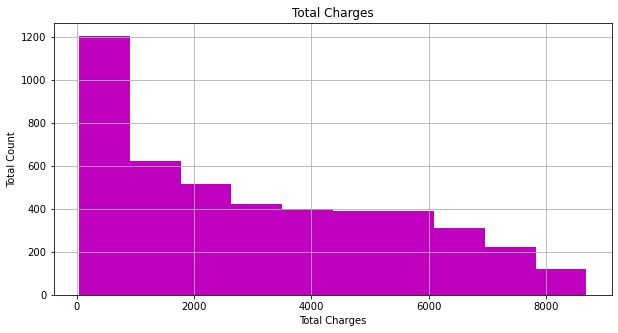

In [11]:
#Histogram
df['Total_Charges'].hist(figsize=(10,5), color='m', alpha=1)
plt.xlabel('Total Charges')
plt.ylabel('Total Count')
plt.title('Total Charges')

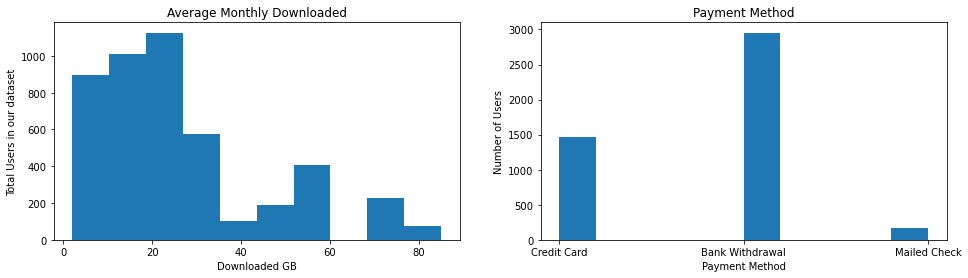

In [12]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.hist(df['Avg_Monthly_GB_Download'])
plt.title("Average Monthly Downloaded")
plt.xlabel("Downloaded GB")
plt.ylabel("Total Users in our dataset")
plt.subplot(1,2,2)
plt.hist(df['Payment_Method'])
plt.xlabel('Payment Method')
plt.title('Payment Method')
plt.ylabel("Number of Users")
plt.show()

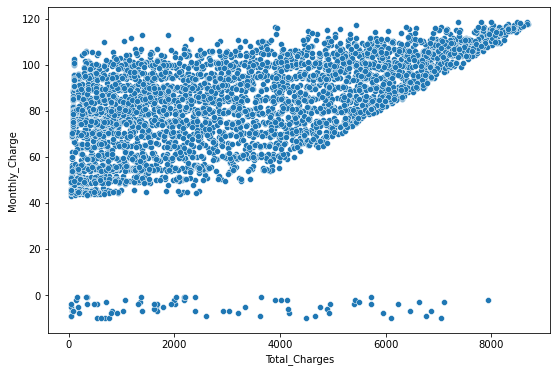

In [13]:
plt.figure(figsize=(9,6))
s.scatterplot(x=df['Total_Charges'],y=df["Monthly_Charge"])
plt.show()

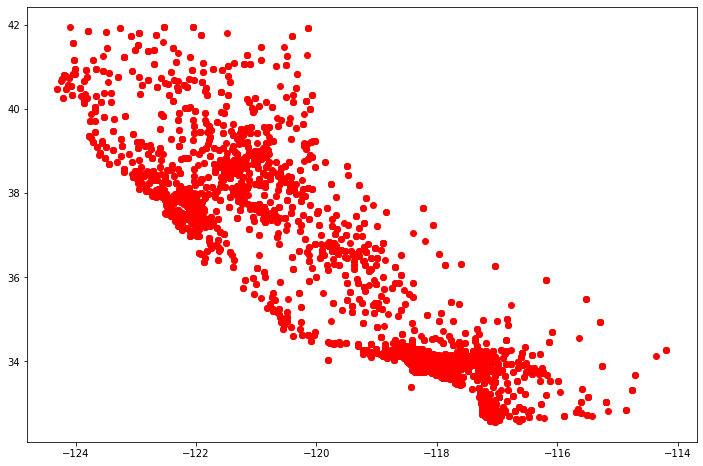

In [14]:
plt.figure(figsize=(12,8))
plt.scatter(df["Longitude"],df["Latitude"],color="red")

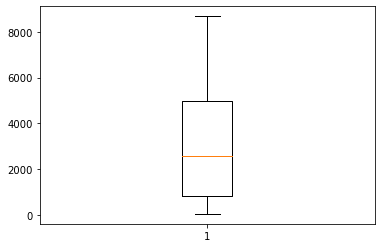

In [15]:
plt.boxplot(df['Total_Charges'])
plt.show()

<AxesSubplot:xlabel='Tenure_in_Months'>

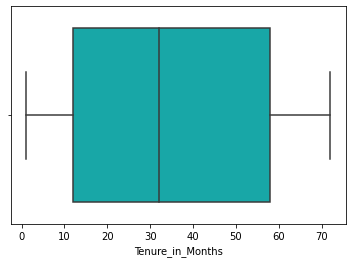

In [16]:
import seaborn as s
s.boxplot(df['Tenure_in_Months'], color='c')

<AxesSubplot:xlabel='Avg_Monthly_GB_Download'>

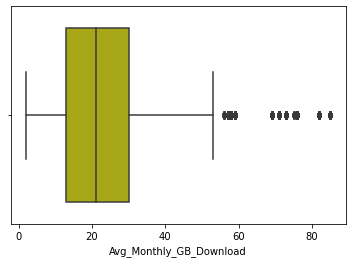

In [17]:
import seaborn as s
s.boxplot(df['Avg_Monthly_GB_Download'], color='y')

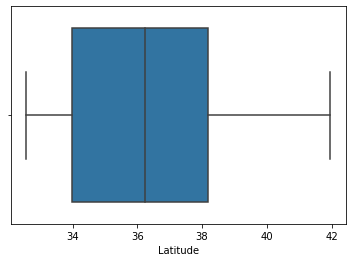

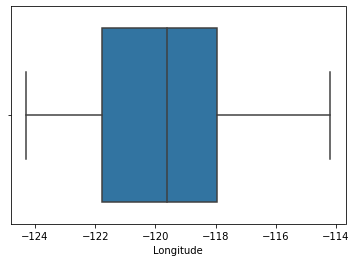

In [18]:
s.boxplot(data['Latitude'])
plt.show()

s.boxplot(data["Longitude"])
plt.show()

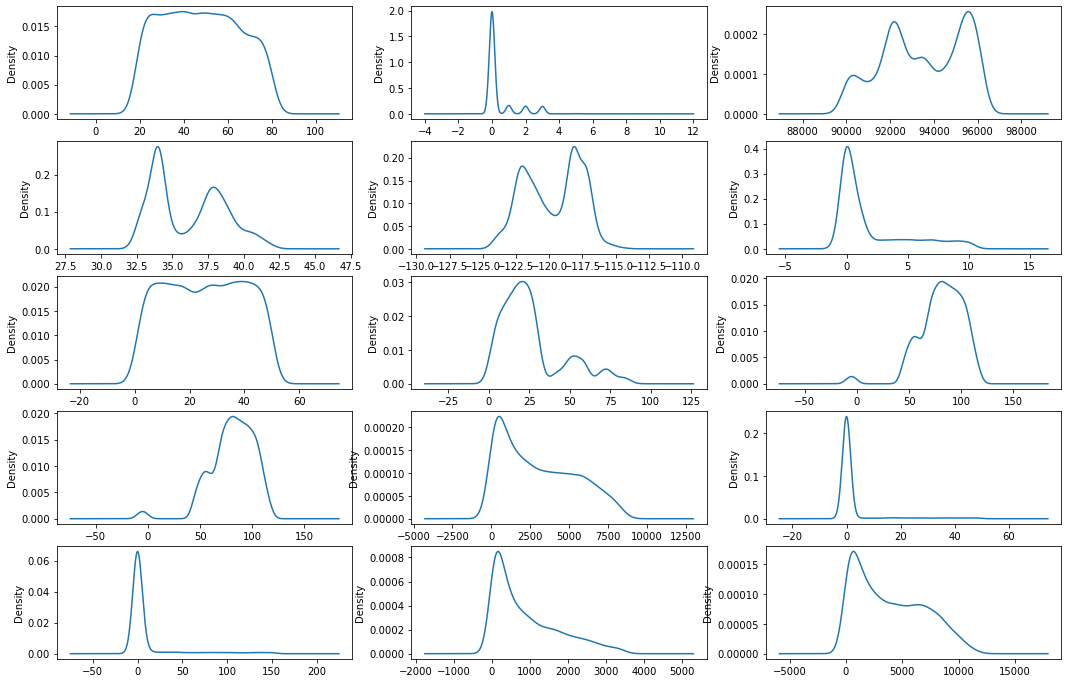

In [19]:
#Density Subplot
plt.figure(figsize= (18,12))
plt.subplot(5,3,1)
df["Age"].plot(kind='density')
plt.subplot(5,3,2)
df["Number_of_Dependents"].plot(kind='density')
plt.subplot(5,3,3)
df["Zip_Code"].plot(kind='density')
plt.subplot(5,3,4)
df["Latitude"].plot(kind='density')
plt.subplot(5,3,5)
df["Longitude"].plot(kind='density')
plt.subplot(5,3,6)
df["Number_of_Referrals"].plot(kind='density')
plt.subplot(5,3,7)
df["Avg_Monthly_Long_Distance_Charges"].plot(kind='density')
plt.subplot(5,3,8)
df["Avg_Monthly_GB_Download"].plot(kind='density')
plt.subplot(5,3,9)
df["Monthly_Charge"].plot(kind='density')
plt.subplot(5,3,10)
df["Monthly_Charge"].plot(kind='density')
plt.subplot(5,3,11)
df["Total_Charges"].plot(kind='density')
plt.subplot(5,3,12)
df["Total_Refunds"].plot(kind='density')
plt.subplot(5,3,13)
df["Total_Extra_Data_Charges"].plot(kind='density')
plt.subplot(5,3,14)
df["Total_Long_Distance_Charges"].plot(kind='density')
plt.subplot(5,3,15)
df["Total_Revenue"].plot(kind='density')
plt.show()

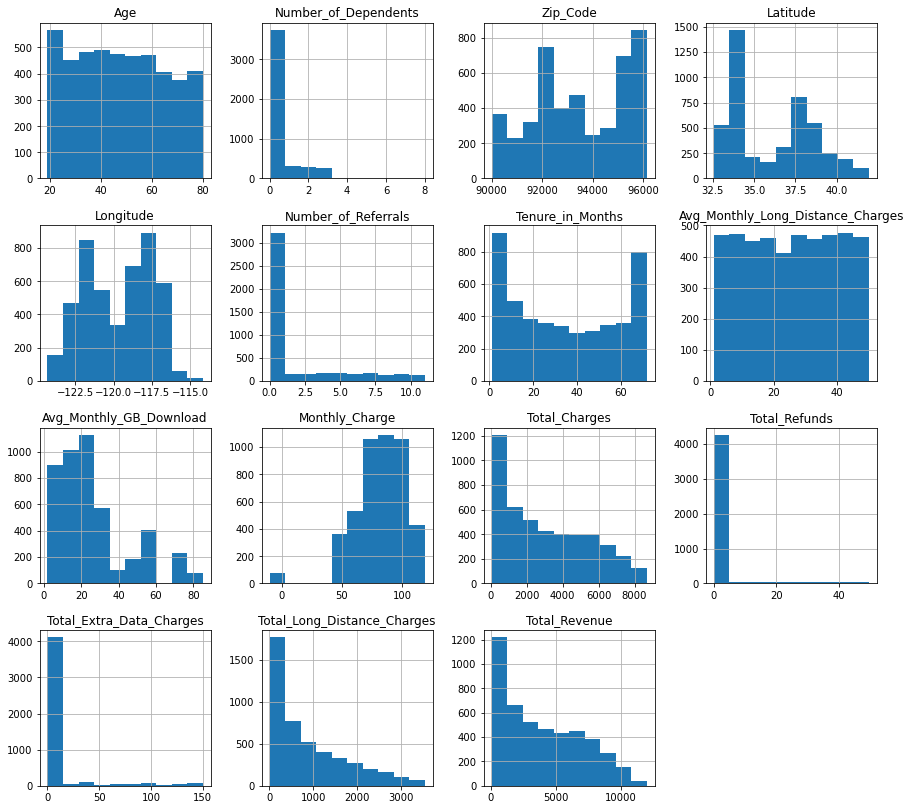

In [20]:
df.hist(figsize=(15,55),layout=(15,4))
plt.show()

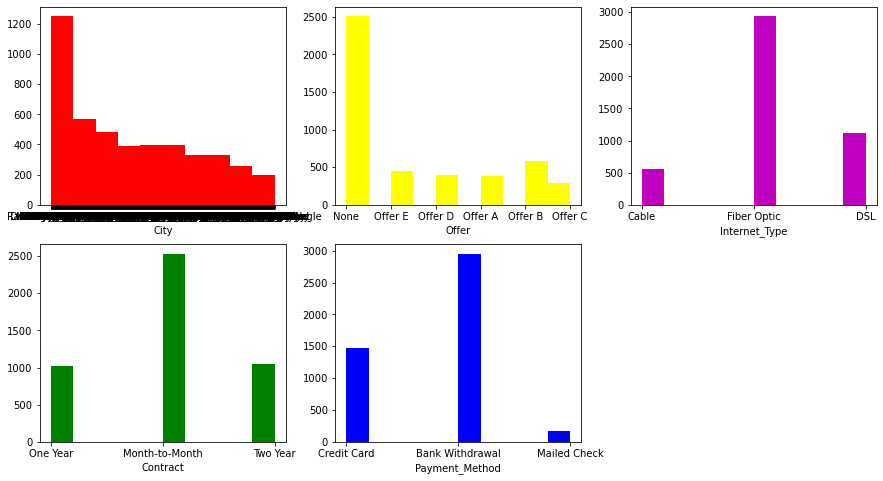

In [21]:
plt.figure(figsize= (15,8))

plt.subplot(2,3,1)
plt.hist(df['City'],color="red")
plt.xlabel("City")


plt.subplot(2,3,2)
plt.hist(df['Offer'],color="yellow")
plt.xlabel("Offer")


plt.subplot(2,3,3)
plt.hist(df['Internet_Type'],color="m")
plt.xlabel("Internet_Type")


plt.subplot(2,3,4)
plt.hist(df['Contract'],color="green")
plt.xlabel("Contract")


plt.subplot(2,3,5)
plt.hist(df['Payment_Method'],color="blue")
plt.xlabel("Payment_Method")
plt.show()

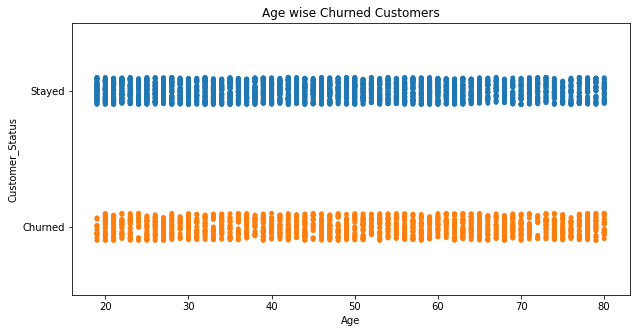

In [22]:
fig, ax = plt.subplots(figsize=(10,5))
s.stripplot(y = df['Customer_Status'], x = df['Age'], ax=ax)
plt.title("Age wise Churned Customers")
plt.show()

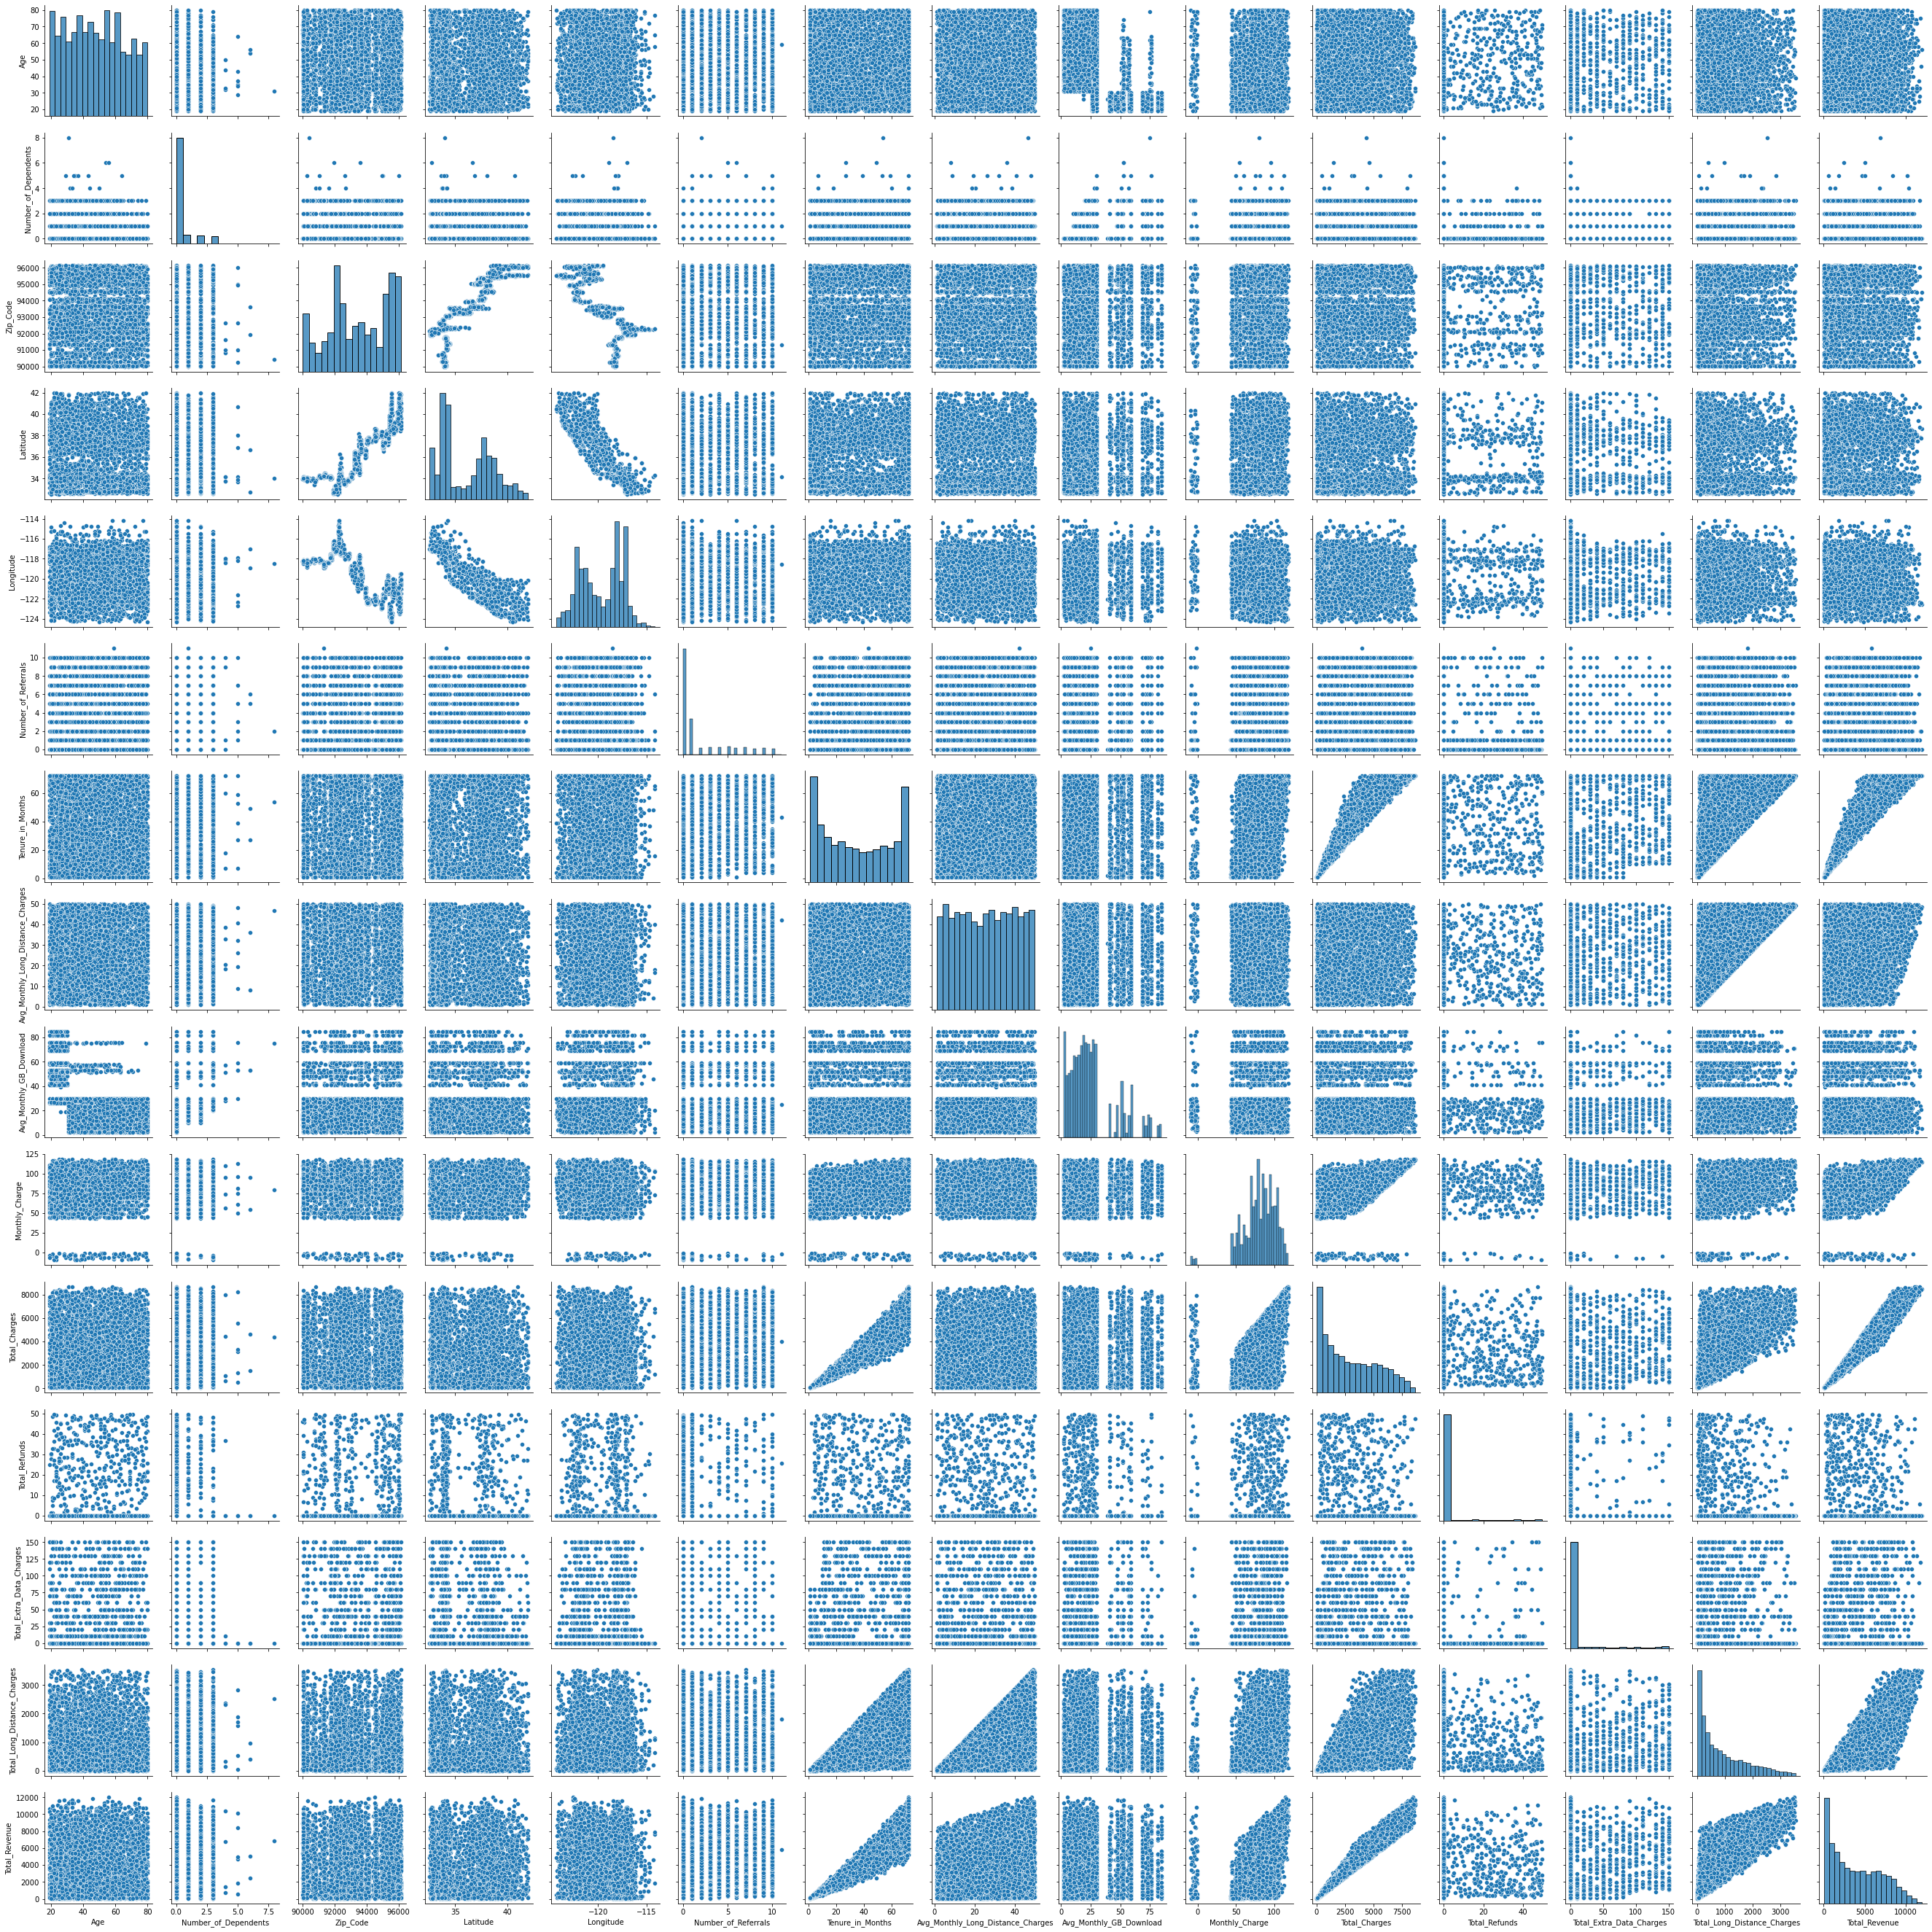

In [23]:
s.pairplot(df)
plt.show()

Month-to-Month    55.01
Two Year          22.69
One Year          22.30
Name: Contract, dtype: float64

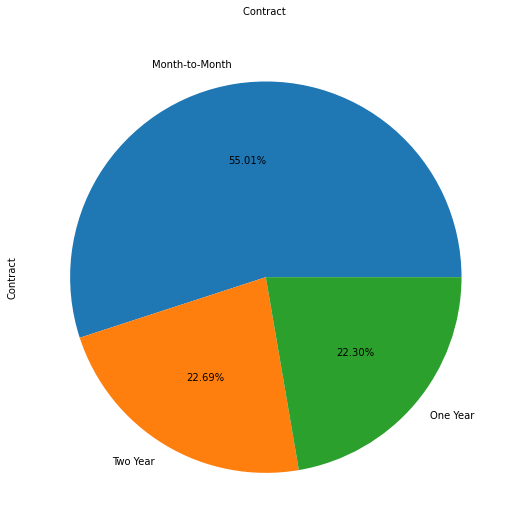

In [24]:
def Contract(df, variable):
    dataframe_pie = df[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(9,9), autopct='%1.2f%%', fontsize = 10)
    ax.set_title(variable + ' \n', fontsize = 10)
    return n.round(dataframe_pie/df.shape[0]*100,2)

Contract(df, 'Contract')

0     52.34
1     17.58
5      3.76
7      3.72
4      3.61
3      3.46
6      3.28
2      3.24
9      3.19
10     2.98
8      2.83
11     0.02
Name: Number_of_Referrals, dtype: float64

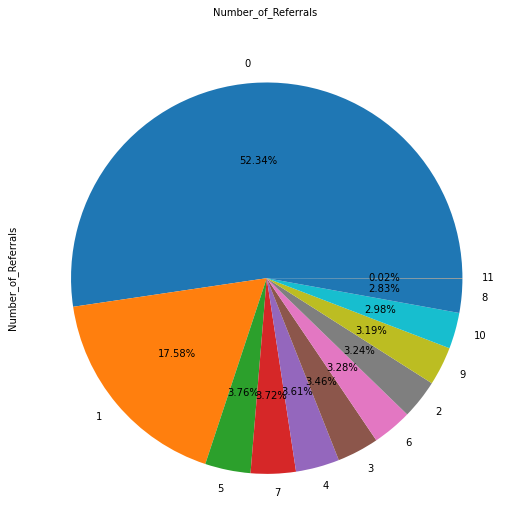

In [25]:
def Referrals(df, variable):
    dataframe_pie = df[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(9,9), autopct='%1.2f%%', fontsize = 10)
    ax.set_title(variable + ' \n', fontsize = 10)
    return n.round(dataframe_pie/df.shape[0]*100,2)

Referrals(df, 'Number_of_Referrals')

Bank Withdrawal    64.20
Credit Card        31.99
Mailed Check        3.80
Name: Payment_Method, dtype: float64

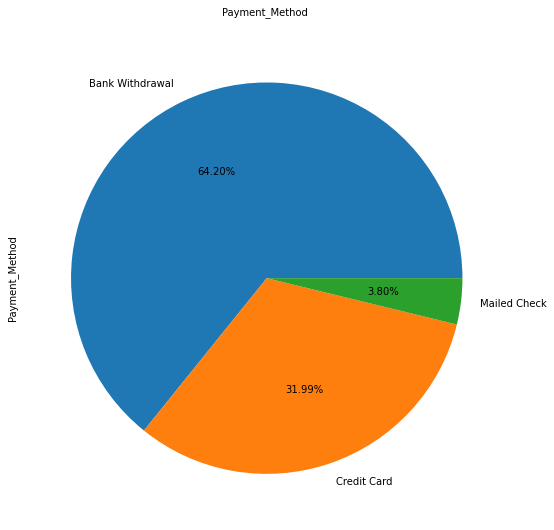

In [26]:
def Payment_Method(df, variable):
    dataframe_pie = df[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(9,9), autopct='%1.2f%%', fontsize = 10)
    ax.set_title(variable + ' \n', fontsize = 10)
    return n.round(dataframe_pie/df.shape[0]*100,2)

Payment_Method(df, 'Payment_Method')

Stayed     65.53
Churned    34.47
Name: Customer_Status, dtype: float64

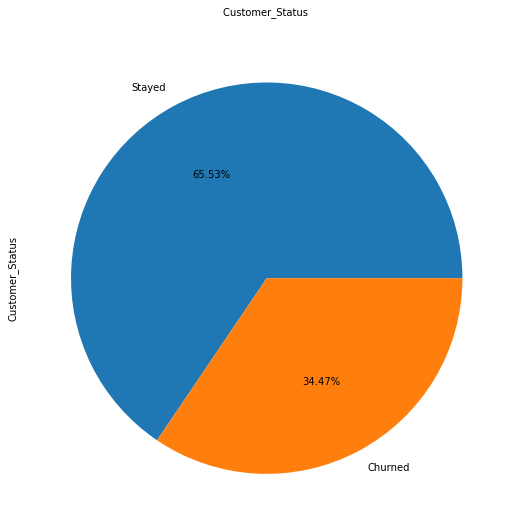

In [27]:
def Status(df, variable):
    dataframe_pie = df[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(9,9), autopct='%1.2f%%', fontsize = 10)
    ax.set_title(variable + ' \n', fontsize = 10)
    return n.round(dataframe_pie/df.shape[0]*100,2)

Status(df, 'Customer_Status')

<AxesSubplot:>

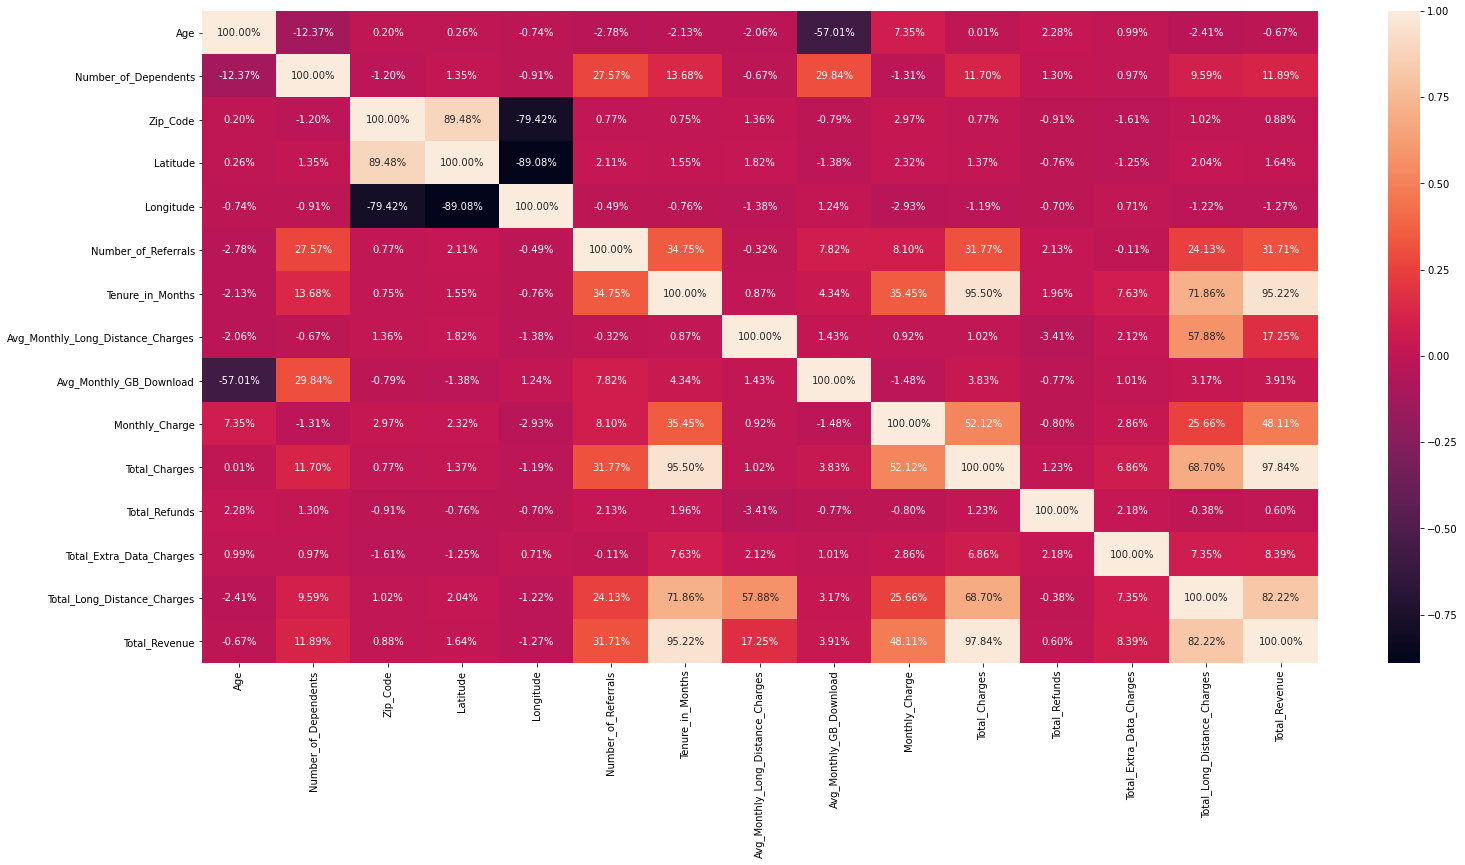

In [28]:
fig, ax = plt.subplots(figsize=(25,12))
s.heatmap(df.corr(),annot = True, fmt='0.2%',cmap = 'rocket',ax=ax)
#YlGnBu, Reds, tab10, rocket, mako, flare, crest, magma, viridis, cubehelix, YlOrBr, vlag, icefire, Spectral, coolwarm, Blues

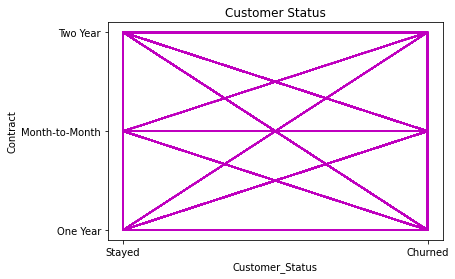

In [29]:
plt.plot(df["Customer_Status"], df["Contract"], color='m')
plt.xlabel('Customer_Status')
plt.ylabel('Contract')
plt.title('Customer Status')
plt.show()

In [30]:
def Customer_Status(df, bygroup):
    dataframe_by_Group = p.crosstab(df[bygroup], columns=df["Customer_Status"], normalize = 'index')
    dataframe_by_Group = n.round((dataframe_by_Group * 100), decimals=2)
    ax = dataframe_by_Group.plot.bar(figsize=(15,7));
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
    ax.set_xticklabels(dataframe_by_Group.index,rotation = 0, fontsize = 15);
    ax.set_title('Customer Status (%) (by ' + dataframe_by_Group.index.name + ')\n', fontsize = 15)
    ax.set_xlabel(dataframe_by_Group.index.name, fontsize = 12)
    ax.set_ylabel('(%)', fontsize = 12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    rects = ax.patches

    # Add Data Labels

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height + 2, 
                str(height)+'%', 
                ha='center', 
                va='bottom',
                fontsize = 12)
    return dataframe_by_Group

Customer_Status  Churned  Stayed
Gender                          
Female             34.88   65.12
Male               34.06   65.94

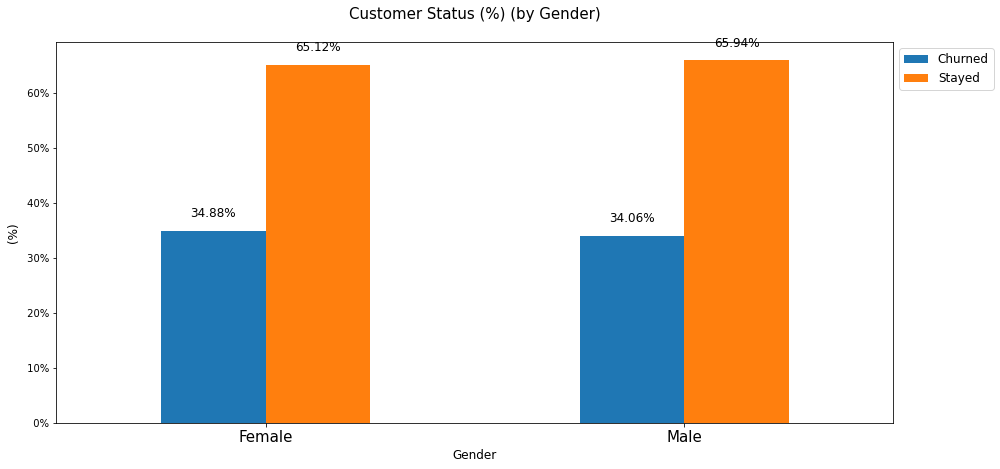

In [31]:
Customer_Status(df, 'Gender')

Customer_Status      Churned  Stayed
Number_of_Referrals                 
0                      43.48   56.52
1                      54.14   45.86
2                      14.09   85.91
3                      17.61   82.39
4                       9.04   90.96
5                      10.98   89.02
6                       3.97   96.03
7                       3.51   96.49
8                       1.54   98.46
9                       2.72   97.28
10                      0.00  100.00
11                      0.00  100.00

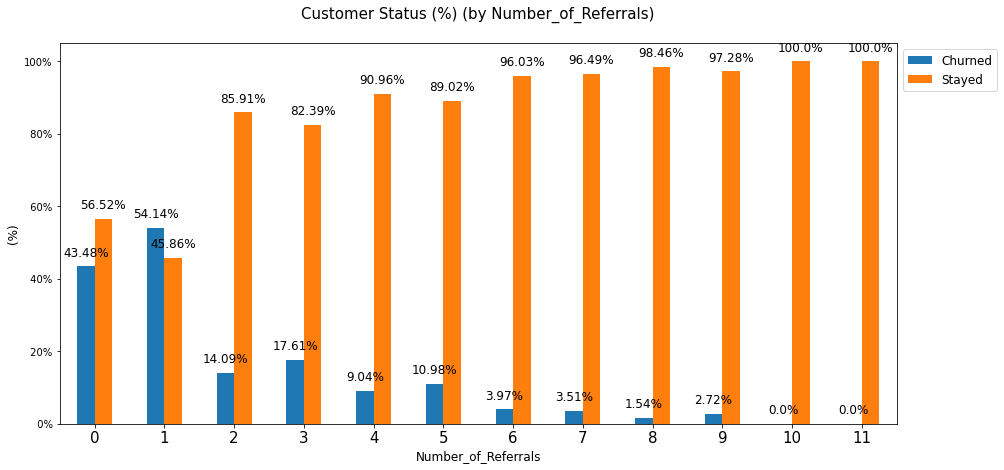

In [40]:
Customer_Status(df, 'Number_of_Referrals')

Customer_Status  Churned  Stayed
Offer                           
None               36.11   63.89
Offer A             8.90   91.10
Offer B            15.04   84.96
Offer C            29.90   70.10
Offer D            36.22   63.78
Offer E            74.16   25.84

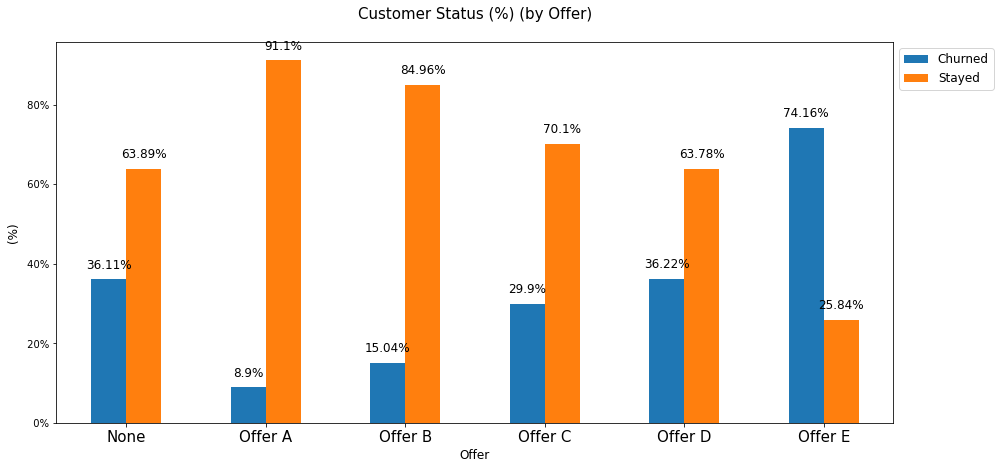

In [41]:
Customer_Status(df, 'Offer')

Customer_Status  Churned  Stayed
Contract                        
Month-to-Month     55.43   44.57
One Year           13.94   86.06
Two Year            3.83   96.17

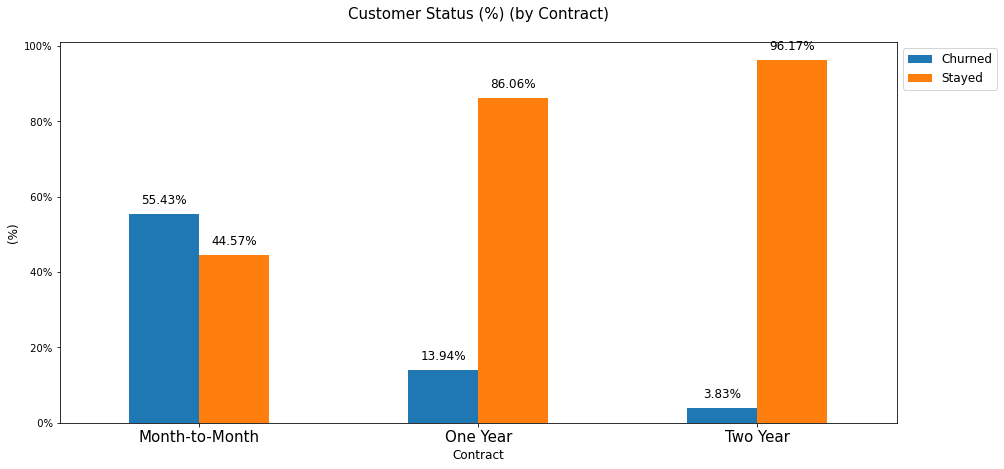

In [46]:
Customer_Status(df, 'Contract')

Customer_Status  Churned  Stayed
Payment_Method                  
Bank Withdrawal    39.91   60.09
Credit Card        21.60   78.40
Mailed Check       50.86   49.14

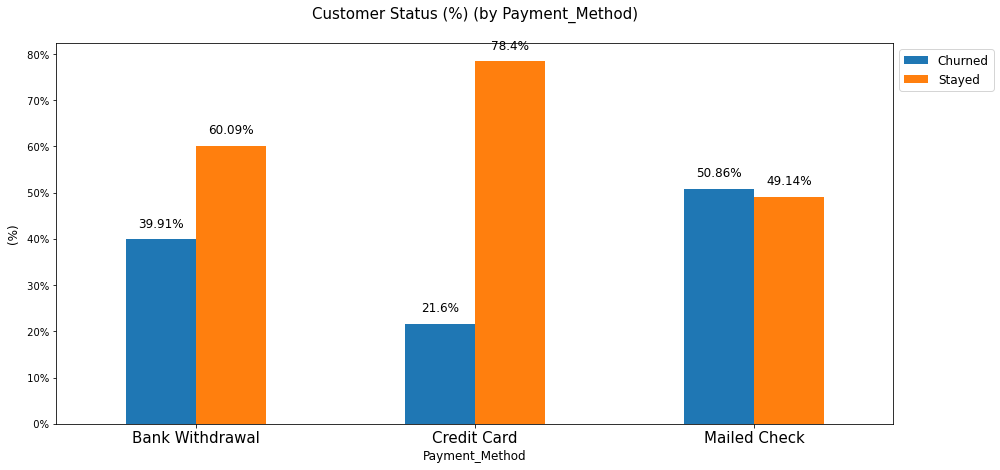

In [47]:
Customer_Status(df, 'Payment_Method')

Customer_Status           Churned  Stayed
Total_Extra_Data_Charges                 
0                           34.36   65.64
10                          60.20   39.80
20                          52.50   47.50
30                          29.55   70.45
40                          35.29   64.71
50                          33.33   66.67
60                          23.33   76.67
70                          13.33   86.67
80                          47.37   52.63
90                          18.75   81.25
100                         27.78   72.22
110                         21.43   78.57
120                         44.00   56.00
130                         22.86   77.14
140                         29.41   70.59
150                         16.22   83.78

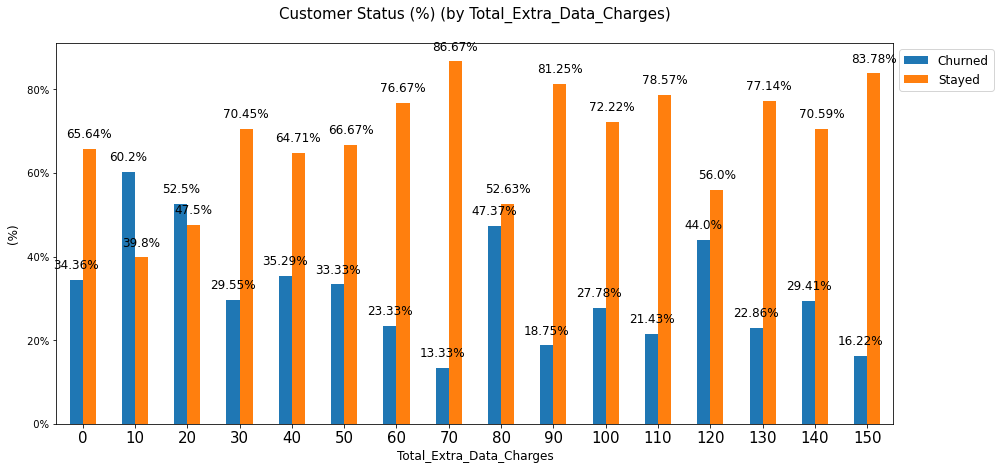

In [49]:
Customer_Status(df, 'Total_Extra_Data_Charges')